# SCA demonstration

Focus of this notebook is to give a demonstration of the actual attack along with comparison of two different architectures used in the project. The only part of the attack that is missing is the collection of the traces from physical device.

Models are already trained in notebooks `1_0_SCA_MLP.ipynb` and `1_1_SCA_CNN.ipynb`. Full attacks were also implemented in those notebooks, but for easier demonstration, they will be repeated here as well.

## Load data


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import os
import numpy as np
import h5py
import tensorflow as tf
import keras
from datetime import datetime
import keras_tuner as kt
from tqdm.notebook import tqdm
import tensorflow_addons as tfa
import keras_tuner as kt

In [3]:
from utils.data_preparation import SCAML_Dataset
from utils.AES import AES
from utils.training import SCA_Trainer

In [4]:
import glob

In [5]:
EXECUTE_IN_COLAB = False
ATTACK_ALGORITHM = 'tinyaes'

if EXECUTE_IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    colab_root_path = '/content/drive/MyDrive/'
    
    training_data_path = colab_root_path + 'datasets/tinyaes/train'
    testing_data_path = colab_root_path + 'datasets/tinyaes/test'
    
    save_models_root_path = colab_root_path + 'models/'
    
    log_root_path = colab_root_path + 'logs/'
else:
    data_root_path = './data/SCA_datasets/datasets/' + ATTACK_ALGORITHM
    
    training_data_path = data_root_path + '/train'
    testing_data_path = data_root_path + '/test'
    
    save_models_root_path = './models/'
    
    log_root_path = './logs/'

MLPs were trained with more datapoints.

In [6]:
dataset_MLP = SCAML_Dataset()

dataset_MLP.create_dataset(training_data_path, attack_point='sub_bytes_out', trace_length=10000)
dataset_MLP.create_dataset(testing_data_path, attack_point='sub_bytes_out', attack=True, trace_length=10000)

256it [00:00, 5220.04it/s]
Loading shards: 100%|████████████████████████████████████████████████████████████████| 256/256 [00:49<00:00,  5.14it/s]
256it [00:01, 164.35it/s]
Loading shards: 100%|████████████████████████████████████████████████████████████████| 256/256 [00:48<00:00,  5.30it/s]


In [7]:
dataset_CNN = SCAML_Dataset()

dataset_CNN.create_dataset(training_data_path, attack_point='sub_bytes_out', trace_length=8000)
dataset_CNN.create_dataset(testing_data_path, attack_point='sub_bytes_out', attack=True, trace_length=8000)

256it [00:00, 4454.31it/s]
Loading shards: 100%|████████████████████████████████████████████████████████████████| 256/256 [00:49<00:00,  5.18it/s]
256it [00:00, 4299.37it/s]
Loading shards: 100%|████████████████████████████████████████████████████████████████| 256/256 [00:55<00:00,  4.64it/s]


# Load model ensambles

Load all of the models needed for key recovery (16 per architecture)

## Load MLP models

In [8]:
model_paths = ['./models/model_1Hypertuner_BestMLP']
models = [tf.keras.models.load_model(model_paths[0])]

for i in range(1, 16):
    model_path = f"./models/model_{i}FullMLP_byte_{i}_ver_2"
    model = tf.keras.models.load_model(model_path)
    models.append(model)

## Load CNN models

In [9]:
CNN_listing = glob.glob('./models/HyperCNN_*2022-04-09_*')

In [10]:
models_CNN = []

for i in tqdm(range(16)):
    model = tf.keras.models.load_model(CNN_listing[i])
    models_CNN.append(model)

  0%|          | 0/16 [00:00<?, ?it/s]

# Perform the attacks

## Evaluate MLP attacks

Given that the MLPs shown worse performance, it is expected to see 

In [89]:
mlp_trainer = SCA_Trainer()

In [91]:
mlp_guesses = mlp_trainer.evaluate_attack(models, dataset_MLP, 1, max_traces=20)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 6.25% of the key using 1 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 6.25% of the key using 2 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 6.25% of the key using 3 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 12.5% of the key using 4 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 12.5% of the key using 5 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 12.5% of the key using 6 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 7 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 8 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 9 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 10 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 11 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 12 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 13 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 14 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 15 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 16 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 17 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 50.0% of the key using 18 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 19 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 20 traces
{}
Model failed to recover any keys using [1-20] traces.


Given MLP's poor performance, it can be concluded that the models have to be trained better. Even in that case, it is expected to see the correct key byte within the first couple of guesses for faulty models:

In [93]:
# Inspect which key bytes were incorrectly guessed
print(mlp_guesses[-1])

(20, array([ 98, 187, 228,  85, 159,  59,  33,  30,  54,  11,  47, 200, 158,
       187, 217, 151], dtype=int64))


In [94]:
guess = mlp_guesses[-1][1]
print(guess)

[ 98 187 228  85 159  59  33  30  54  11  47 200 158 187 217 151]


In [95]:
correct_key = dataset_MLP.get_correct_key(0)
print(correct_key)

[  0 243 228  82  31  59  33  30  54  11  32 234 158 105 217 151]


In [96]:
np.array(correct_key) == np.array(guess)

array([False, False,  True, False, False,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True])

The model failed to guess the first byte correctly (among other failed bytes), so the first model can be further inspected and evaluated:

  0%|          | 0/1 [00:00<?, ?it/s]

2/2 [==============================] - 0s 10ms/step


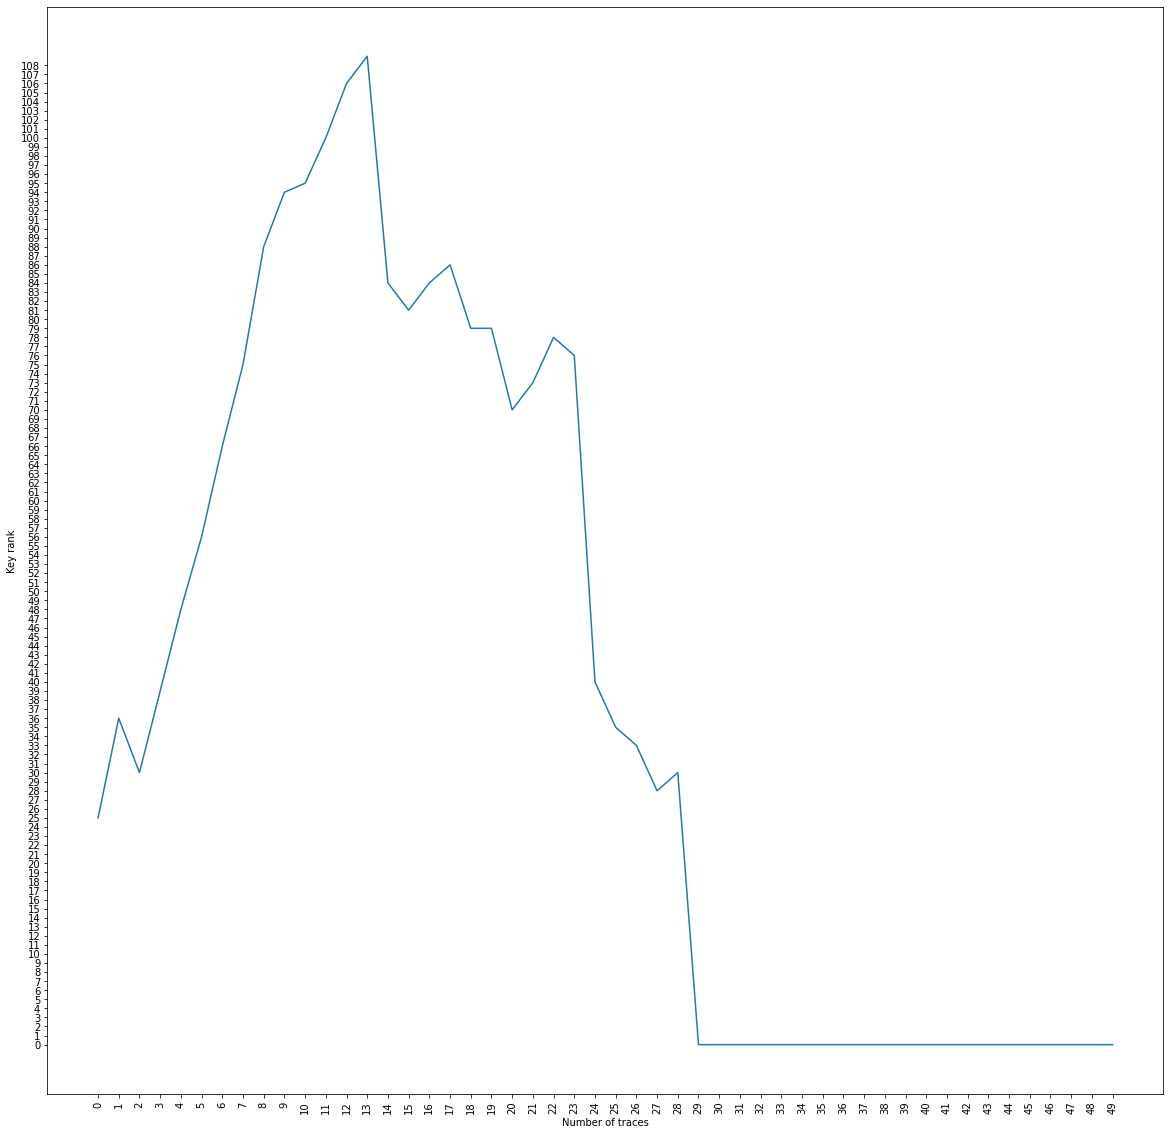

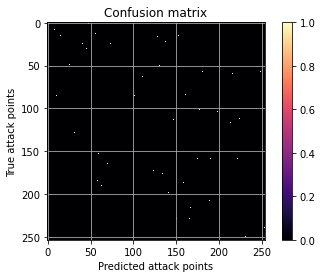

In [97]:
mlp_trainer.evaluate_model(models[0], dataset_MLP, attack_byte=0, keys_to_attack=1, traces_per_chunk=50)

It can be observed that for the model attacking the 1st byte, 29 traces were enough to reduce key rank to zero. This means that the results would probably be better if more traces were used in attack evaluation:

In [98]:
mlp_guesses = mlp_trainer.evaluate_attack(models, dataset_MLP, 1, max_traces=50)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 6.25% of the key using 1 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 6.25% of the key using 2 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 6.25% of the key using 3 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 12.5% of the key using 4 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 12.5% of the key using 5 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 12.5% of the key using 6 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 7 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 8 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 9 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 10 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 11 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 37.5% of the key using 12 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 13 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 14 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 15 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 16 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 43.75% of the key using 17 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 50.0% of the key using 18 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 19 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 20 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 21 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 22 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 23 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 24 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 25 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 26 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 27 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 56.25% of the key using 28 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 62.5% of the key using 29 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 68.75% of the key using 30 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 68.75% of the key using 31 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 68.75% of the key using 32 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 33 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 34 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 35 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 36 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 37 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 38 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 39 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 40 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 41 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 42 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 43 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 44 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 45 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 46 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 47 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 48 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 49 traces


  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 50 traces
{}
Model failed to recover any keys using [1-50] traces.


In [100]:
mlp_guesses[-1][1]

array([  0, 155, 228, 120,  31,  59,  33,  30,  54,  11, 125, 234, 158,
        89, 217, 151], dtype=int64)

The recovery is better this time, but some bytes are still not correct.

In [101]:
np.array(correct_key) == np.array(mlp_guesses[-1][1])

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True])

In [117]:
mlp_trainer.attack_full_key(models, None, dataset_MLP, 0, 50)

  0%|          | 0/16 [00:00<?, ?it/s]

Recovered 75.0% of the key using 50 traces


array([  0, 155, 228, 120,  31,  59,  33,  30,  54,  11, 125, 234, 158,
        89, 217, 151], dtype=int64)

In [122]:
print(mlp_trainer.ranks_history[1][-1][1])

[155 247 221 174 234 187 147 179  57 241 249 189 208  55 211 185 170 151
  25  85 145 242 194 195 101 226 113  19 246 233  49  81 193 217  62 213
 132 244 238  68  21  46 253 104 112 186  64 183 250  63  47 223 108 161
   0  48 230  16  96 252  66 154 255 209 235 110   4 232 219  89 156 125
  86 218 148  54 139 114 158 167  94  59 176  42 243 121 210  91 177 146
  88  29 119  82   5 126  41  74  18   8 129  31 160  61  80 171 106 227
   2 149  97 153 191 123  37 205 118 116 225 144 157 214 134 248 224 164
 168 180 166 172 117 122 128 162 100 182 163 216 206 133  45 136 251 188
 220  35 181 140 175 190 202  70  20 196 245  56 103 231  98  17 239 107
   3  36   9  34  14 159 142  76  39  23 165 120  44 143 201  32  11  92
  79  22  78 192  15 131  30 115 130 197 102  13 137 105  33 207 254 138
  38  83  58  52   7 198 215  65  27  69 228  84 150  67 173 135 127  53
 200  71 169  77  99 222 124   6  28 152 229 240  93 178  10 236  72  75
  24   1  90  50  95 141 212 204  26 237  40  73 18

In [123]:
a = np.asarray(mlp_trainer.ranks_history[1][-1][1])
np.where(a == 243)

(array([84], dtype=int64),)

Brute force search trough the list of predictions would have given the correct key after 84 passes, which is still a drastic improvement over random guessing. Only 25% of the key above would be attacked by brute force, and because only individual bytes are attacked, there is only 256 possibilities for each byte. This could be applied to the rest of the incorrect guesses.

In [15]:
cnn_trainer = SCA_Trainer()

In [ ]:
cnn_guesses = cnn_trainer.evaluate_attack(models_CNN, dataset_CNN, 2, max_traces=20)

# Conclusions

Applying machine learning techniques to cryptanalysis is relatively new concept, and there is a lot of research happening in this area. It is obvious that this is still a hard and only partially explored topic. Making Side Channell Attacks easier could help hardware (and software) developers to develop products that are more resillient and secure. Of course, as is often case in security, there is a constant race between attackers and defenders and tools such as techniques listed in this project could be useful for both sides.

Some of the takeaways from this project:
* Using Keras hypertuner proved to be beneficial when finding the right model architecture. 
* Convolutional models performed better than simple MLPs.
* MLPs still reduce the search spaces drastically when attacking crypto keys
* Convolutional models were able to learn internal features of the data without any preprocessing
* Other architectures could further improve performance of the attacks, but were out of scope at the time of writing this
* ML based techniques are simpler to setup and understand, but very hard to train properly

# Further research:

Deep-Cryptanalysis - Fashion or Revolution? [video](https://www.youtube.com/watch?v=hUmsyaPU-qU&t=2s)

Unsupervised Learning SCA: [video](https://www.youtube.com/watch?v=so-18y5Avr0)/[paper](https://arxiv.org/pdf/2001.05951.pdf)

Tips on tuning neural networks SCA [video](https://www.youtube.com/watch?v=uSpFfacjU4g)